In [1]:
# Exploratory Data Analysis and Model Prediction using XGBoost

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

In [2]:
# Load the datasets
X_train = pd.read_csv("../data/processed/X_train_engineered.csv")
X_test = pd.read_csv("../data/processed/X_test_engineered.csv")
y_train = pd.read_csv("../data/processed/y_train.csv")
y_test = pd.read_csv("../data/processed/y_test.csv")

In [3]:
# Ensure y_train and y_test are in the correct format
y_train = y_train.values.ravel().astype(int)
y_test = y_test.values.ravel().astype(int)

In [4]:
# Load the XGBoost model
xgb_model = joblib.load("../models/xgboost.pkl")

In [5]:
# Perform predictions
y_pred = xgb_model.predict(X_test)
y_pred_prob = xgb_model.predict_proba(X_test)[:, 1]

In [6]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
cm = confusion_matrix(y_test, y_pred)

In [7]:
# Display metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print("Confusion Matrix:")
print(cm)

Accuracy: 0.9176
Precision: 0.9308
Recall: 0.8462
F1 Score: 0.8864
ROC AUC: 0.9841
Confusion Matrix:
[[224   9]
 [ 22 121]]


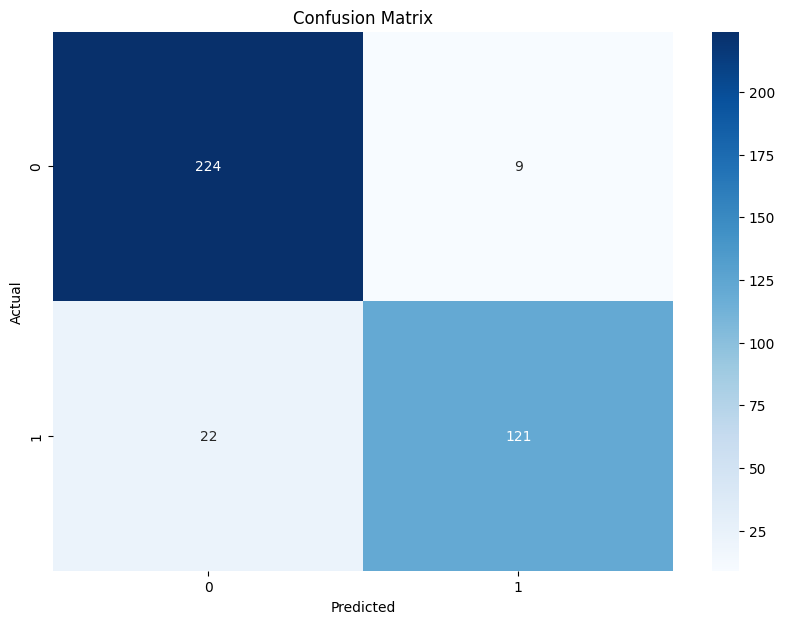

In [8]:
# Plot Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

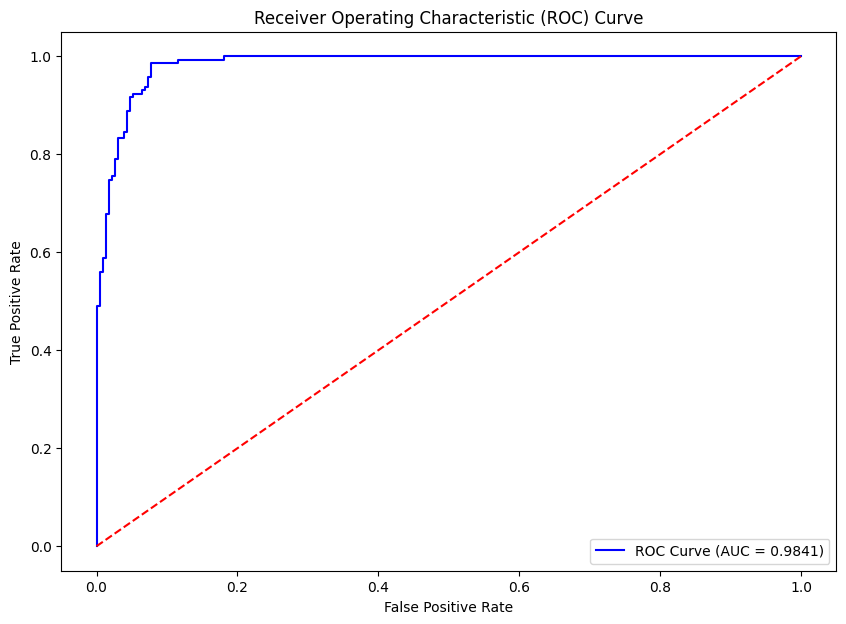

In [9]:
# Plot ROC Curve
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

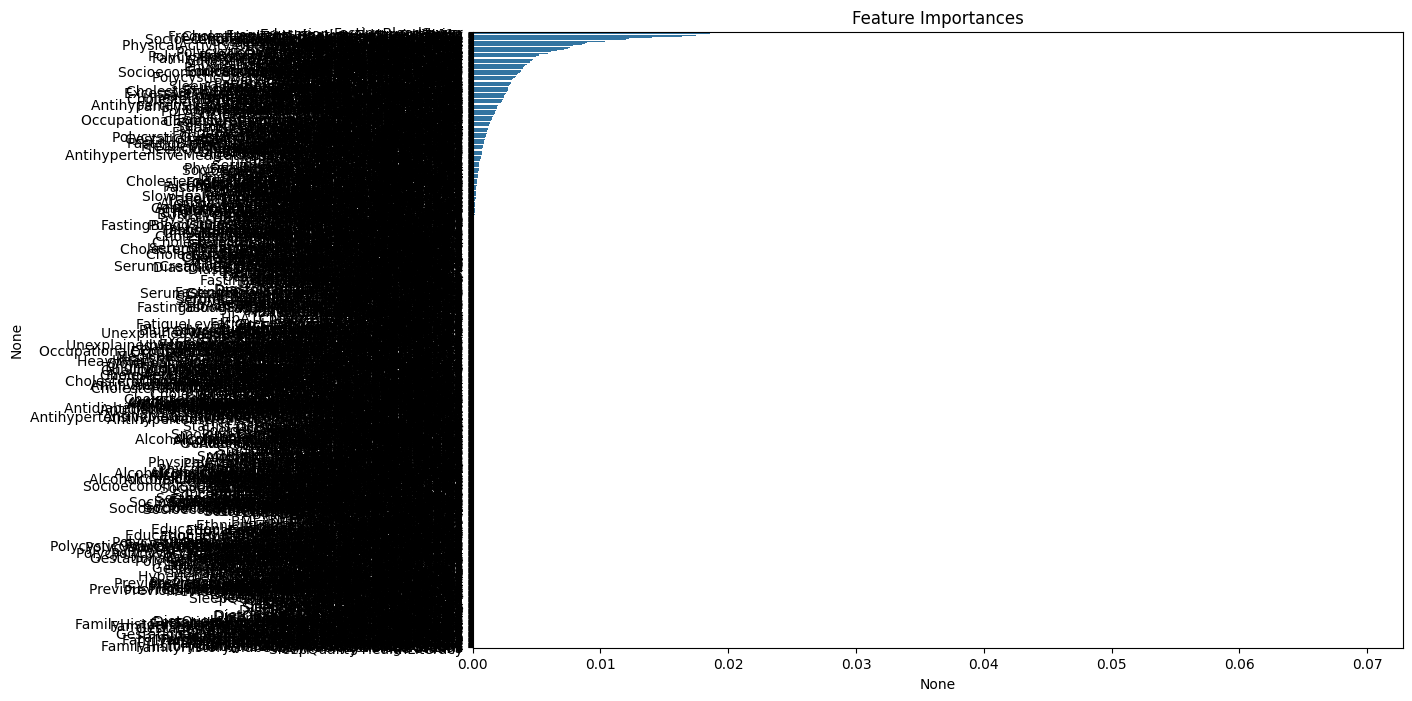

In [10]:
# Display feature importances
feature_importances = pd.Series(xgb_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('Feature Importances')
plt.show()

In [11]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='roc_auc')
print(f"Cross-Validation ROC AUC Scores: {cv_scores}")
print(f"Mean Cross-Validation ROC AUC Score: {np.mean(cv_scores)}")

Cross-Validation ROC AUC Scores: [0.9878194  0.98365235 0.9894679  0.97359066 0.9768834 ]
Mean Cross-Validation ROC AUC Score: 0.9822827411168937


In [12]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='roc_auc', cv=5, verbose=1)
grid_search.fit(X_train, y_train)

# Best parameters and best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best ROC AUC Score: {grid_search.best_score_}")

# Update the model with best parameters
best_xgb_model = grid_search.best_estimator_

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best ROC AUC Score: 0.9843474225586597


In [13]:
# Evaluate and compare different models
models = {
    'Logistic Regression': joblib.load("../models/logistic_regression.pkl"),
    'Random Forest': joblib.load("../models/random_forest.pkl"),
    'XGBoost': best_xgb_model  # use the best model from grid search
}

for model_name, model in models.items():
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    cm = confusion_matrix(y_test, y_pred)
    
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    print("Confusion Matrix:")
    print(cm)
    print("\n")

Model: Logistic Regression
Accuracy: 0.7899
Precision: 0.7319
Recall: 0.7063
F1 Score: 0.7189
ROC AUC: 0.8386
Confusion Matrix:
[[196  37]
 [ 42 101]]


Model: Random Forest
Accuracy: 0.9122
Precision: 0.9435
Recall: 0.8182
F1 Score: 0.8764
ROC AUC: 0.9769
Confusion Matrix:
[[226   7]
 [ 26 117]]


Model: XGBoost
Accuracy: 0.9255
Precision: 0.9323
Recall: 0.8671
F1 Score: 0.8986
ROC AUC: 0.9860
Confusion Matrix:
[[224   9]
 [ 19 124]]




c:\Users\pinar\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


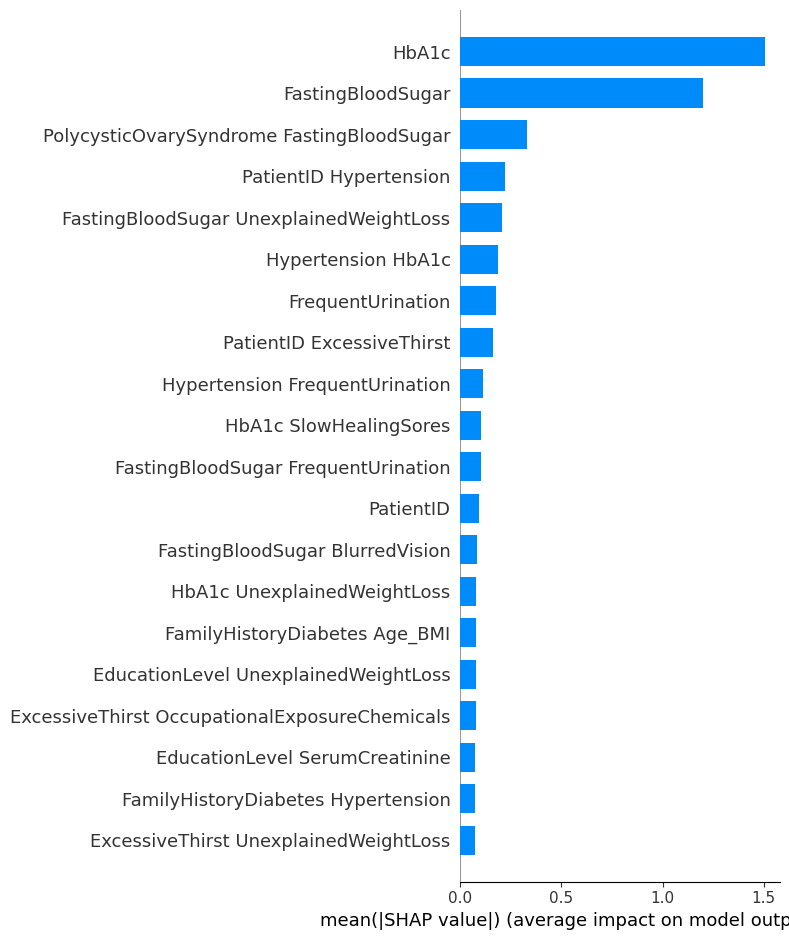

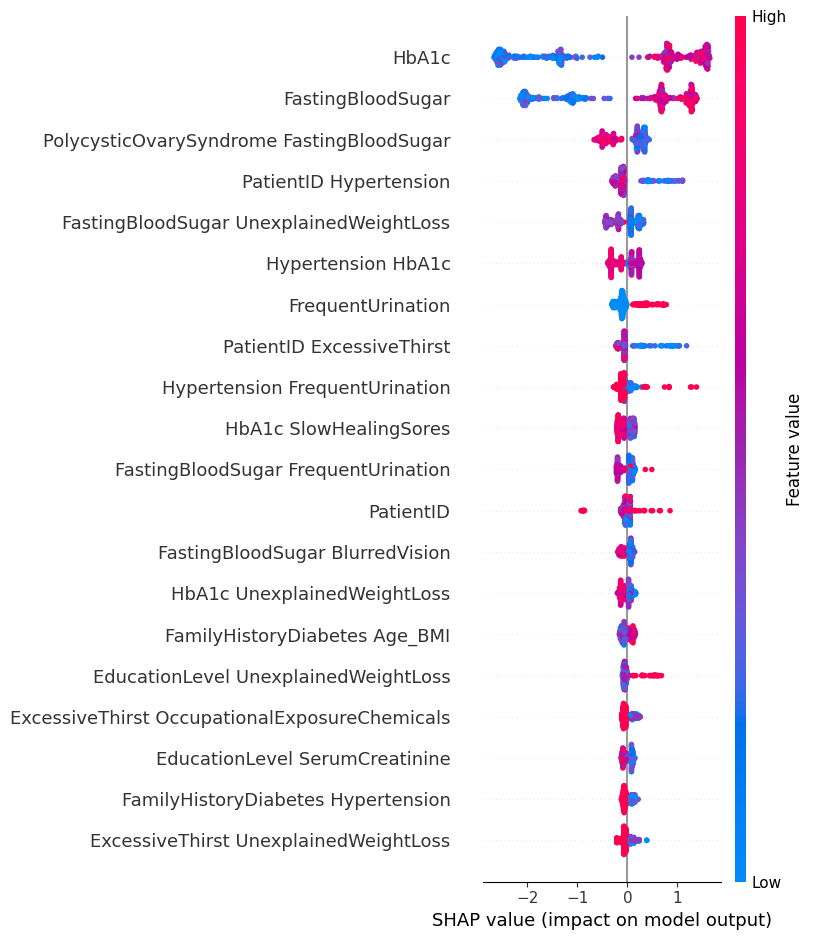

In [16]:
import shap

# Initialize SHAP explainer
explainer = shap.TreeExplainer(best_xgb_model)
shap_values = explainer.shap_values(X_test)

# Plot SHAP summary
shap.summary_plot(shap_values, X_test, plot_type="bar")
shap.summary_plot(shap_values, X_test)

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier

# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
])

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Save the pipeline
joblib.dump(pipeline, "../models/pipeline_xgboost.pkl")

['../models/pipeline_xgboost.pkl']